1- Utilize o dataset “titanic.csv”, disponível no moodle. Considere 70% das instâncias para treino e 30% para validação. Construa um modelo utilizando Árvore de Decisão para prever se uma pessoa sobreviveu ou não.

In [39]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = sns.load_dataset('titanic')
df['sex'] = pd.Categorical(df['sex'])
df['embarked'] = pd.Categorical(df['embarked'])
df['who'] = pd.Categorical(df['who'])
df['embark_town'] = pd.Categorical(df['embark_town'])
df['alive'] = pd.Categorical(df['alive'])
df['fclass'] = df['class'].cat.codes
df['fsex'] = df['sex'].cat.codes
df['fembarked'] = df['embarked'].cat.codes
df['fwho'] = df['who'].cat.codes
df['fembark_town'] = df['embark_town'].cat.codes
df['falive'] = df['alive'].cat.codes

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt

train, test = train_test_split(df, test_size=0.3, random_state=42)
features = ['pclass', 'fsex', 'age', 'fembarked', 'fclass', 'fwho', 'adult_male', 'fembark_town', 'alone']
x_train = train[features]
y_train = train['survived']

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

a) Mostre a árvore encontrada.

[]

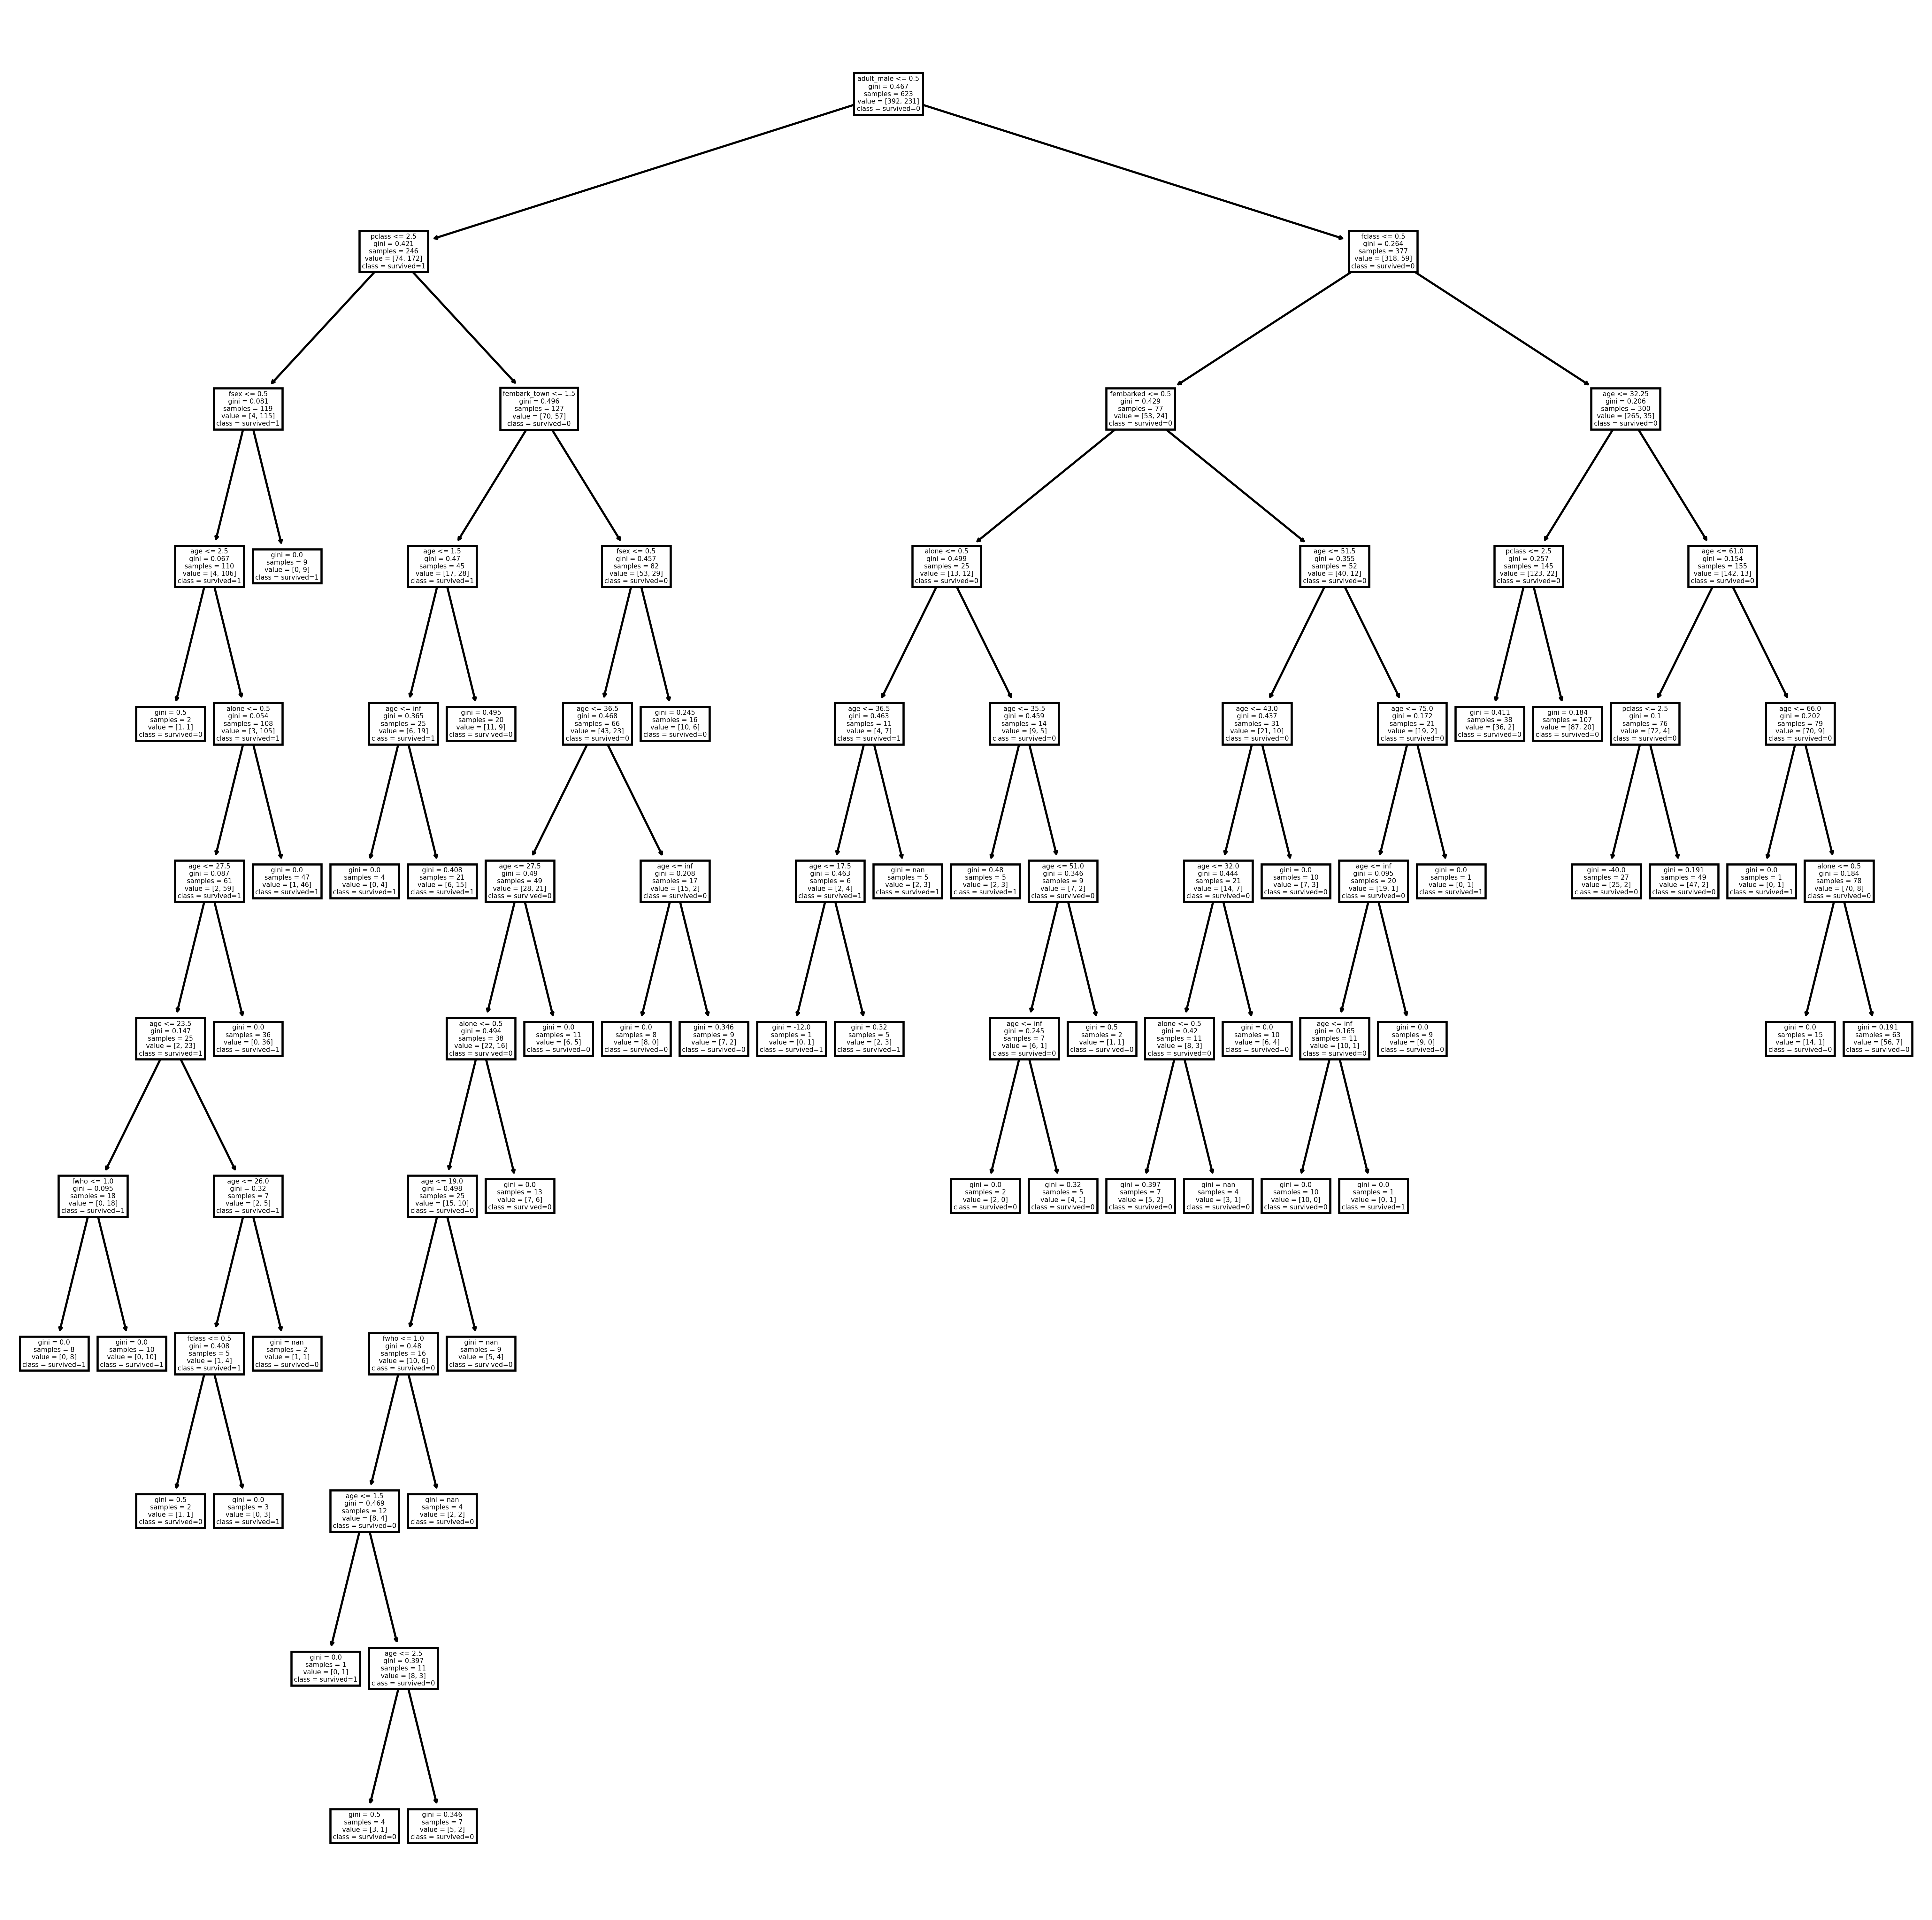

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=480)
tree.plot_tree(clf, feature_names = x_train.columns, class_names=['survived=0', 'survived=1']) 
plt.plot()

b) Qual a acurácia do modelo obtida com os dados de validação?

In [42]:
x_test = test[features]
y_test = test['survived']
print(clf.score(x_test, y_test))

0.7910447761194029


2- Considere ainda uma árvore de decisão para classificar se um indivíduo sobreviveu ou não com base no dataset “titanic.csv”. Qual o resultado médio de acurácia utilizando a estratégia da validação cruzada 10-fold? Discuta os resultados.

In [43]:
from sklearn.model_selection import cross_val_score
model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, x_train, y_train, cv=10)
print(scores.mean())
print(scores.std())

0.786431131592422
0.050662893487542486


3- Ainda considerando o dataset “titanic.csv”, construa um modelo utilizando k-NN para prever se uma pessoa sobreviveu ou não. Considere diferentes valores de k vizinhos: k={2,3,4,5,6,7}. Houve variação significativa nos diferentes modelos testados? Algum deles foi melhor do que a estratégia baseada em árvore de decisão?

In [46]:
from sklearn.neighbors import KNeighborsClassifier
train, test = train_test_split(df.dropna(), test_size=0.3, random_state=42)
features = ['pclass', 'fsex', 'age', 'fembarked', 'fclass', 'fwho', 'adult_male', 'fembark_town', 'alone']
x_train = train[features]
y_train = train['survived']
for k in [2, 3, 4, 5, 6, 7]:
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, x_train, y_train, cv=k+1)
    print(k, scores.mean())

2 0.5435585086747877
3 0.6383568548387097
4 0.6381538461538463
5 0.6695526695526696
6 0.7017543859649124
7 0.7171875


Como é possivel ver pela estratégia de validação cruzada, nenhum dos modelos de KNN foi melhor que a arvore de decisão.